In [1]:
%matplotlib inline
import sys
sys.path.insert(0,'..')
from IPython.display import HTML,Image,SVG,YouTubeVideo
from helpers import header

HTML(header())

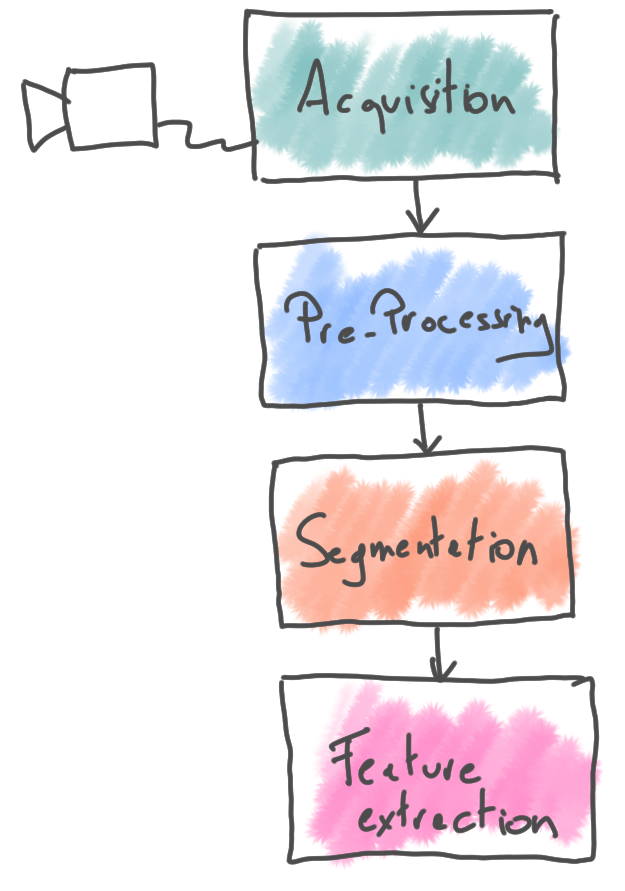

In [3]:
Image('http://homepages.ulb.ac.be/~odebeir/data/ip_chain.png')